# Modelo de deteccion de phishing en contenido web (HTML)

### Modelos a utilizar: SVM, Random Forest y Naive Bayes

Referencias:  
Tiwari, S., (2021) Phishing Dataset for Machine Learning. https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning


#### Analisis Exploratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get sklearn version
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
df = pd.read_csv("datasets/Content/Phishing_Legitimate_full.csv")
df.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


In [4]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
print("Good websites: ", df['CLASS_LABEL'].value_counts()[0])
print(df[df.CLASS_LABEL == 0].head(10))

Good websites:  5000
        id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
5000  5001        2               1          0         25        0   
5001  5002        2               1          0         24        0   
5002  5003        2               1          0         21        0   
5003  5004        2               1          0         22        0   
5004  5005        2               1          0         25        0   
5005  5006        2               1          0         22        0   
5006  5007        1               0          0         20        0   
5007  5008        2               1          0         22        0   
5008  5009        3               1          0         24        0   
5009  5010        2               1          0         25        0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
5000                  0         0            0              0  ...   
5001                  0         0            0              0  ...  

In [6]:
print("Phishing websites: ", df['CLASS_LABEL'].value_counts()[1])
print(df[df.CLASS_LABEL == 1].head(10))

Phishing websites:  5000
   id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   
5   6        3               1          1         42        1   
6   7        2               0          5         60        0   
7   8        1               0          3         30        0   
8   9        8               7          2         76        1   
9  10        2               0          2         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0

In [7]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


<Axes: xlabel='CLASS_LABEL', ylabel='count'>

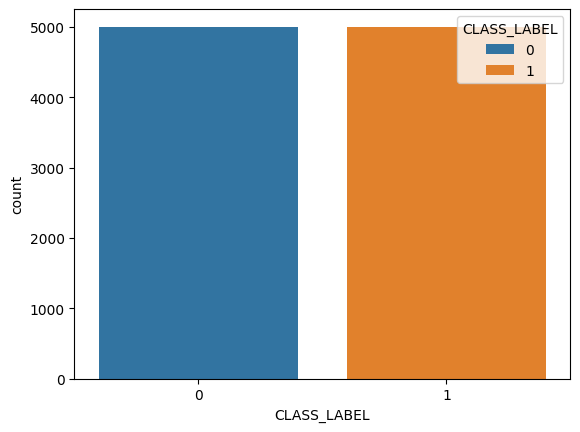

In [8]:
sns.countplot(x='CLASS_LABEL', data=df, hue='CLASS_LABEL')

In [9]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Change name CLASS_LABEL to label
df = df.rename(columns={'CLASS_LABEL': 'label'})

In [11]:
def correlation_heatmap(data, idx_s, idx_e):
    y = data['label']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['label'] = y
    sns.heatmap(temp.corr(), annot=True, fmt=".2f")
    plt.show()

In [12]:
# Remove unnecessary columns
df = df.iloc[:, 27:]

In [13]:
df = df.drop(['UrlLengthRT'], axis=1)

In [14]:
df = df.drop(['SubdomainLevelRT'], axis=1)

In [15]:
df.columns

Index(['PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'label'],
      dtype='object')

In [16]:
df.to_csv("datasets/Content/Phishing_Legitimate_clean.csv", index=False)

# Entrenamiento de modelos
### Modelos a utilizar: SVM, Random Forest y Naive Bayes

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

In [18]:
data = pd.read_csv("datasets/Content/Phishing_Legitimate_clean.csv")
scaler = MinMaxScaler()

In [19]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Lazy Predict

In [20]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 31/31 [00:07<00:00,  4.16it/s]

[LightGBM] [Info] Number of positive: 3718, number of negative: 3782
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495733 -> initscore=-0.017067
[LightGBM] [Info] Start training from score -0.017067
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.98               0.98     0.98      0.98   
RandomForestClassifier             0.98               0.98     0.98      0.98   
LGBMClassifier                     0.98               0.98     0.98      0.98   
XGBClassifier                      0.98  

In [21]:
# Show the top 5 models
models.head(5)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.98,0.98,0.98,0.98,0.10
RandomForestClassifier,0.98,0.98,0.98,0.98,0.30
LGBMClassifier,0.98,0.98,0.98,0.98,0.06
XGBClassifier,0.98,0.98,0.98,0.98,0.19
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.26


#### Random Forest

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1218
           1       0.98      0.98      0.98      1282

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



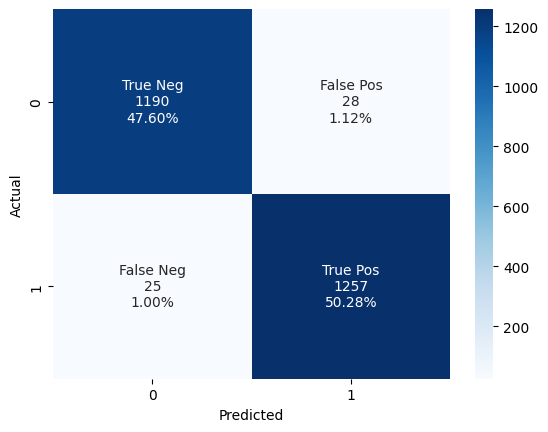

In [22]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)

predictions_RF = model_RF.predict(X_test)
cm = confusion_matrix(y_test, predictions_RF)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')


print(classification_report(y_test, predictions_RF))

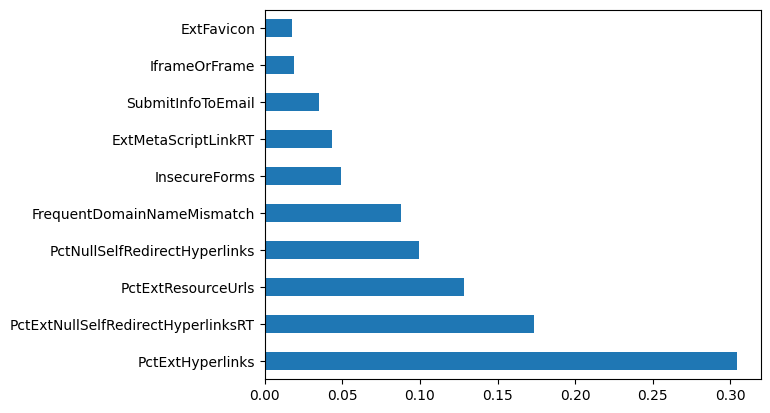

In [23]:
# Graph Feature Importance
feature_importances = pd.Series(model_RF.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

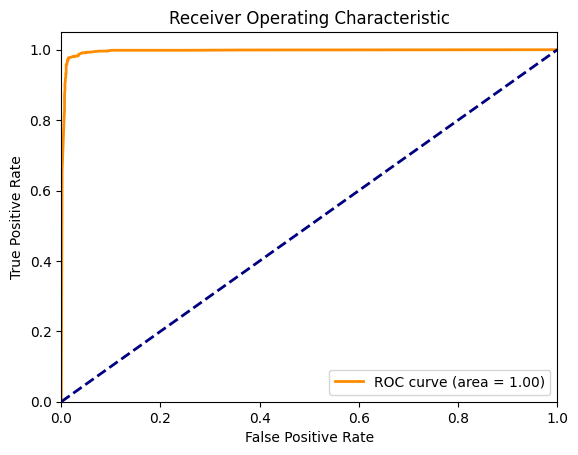

In [24]:
# Graph roc curve and auc score

probabilities = model_RF.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()


In [25]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_RF, X, y, cv=10, scoring='accuracy')
print(scores)

print("Overall accuracy: ", scores.mean())
random_forest_overall_accuracy = scores.mean()

[0.978 0.969 0.976 0.98  0.975 0.977 0.981 0.957 0.97  0.976]
Overall accuracy:  0.9739000000000001


#### LGBM Classifier

[LightGBM] [Info] Number of positive: 3718, number of negative: 3782
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495733 -> initscore=-0.017067
[LightGBM] [Info] Start training from score -0.017067
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1218
           1       0.98      0.98      0.98      1282

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



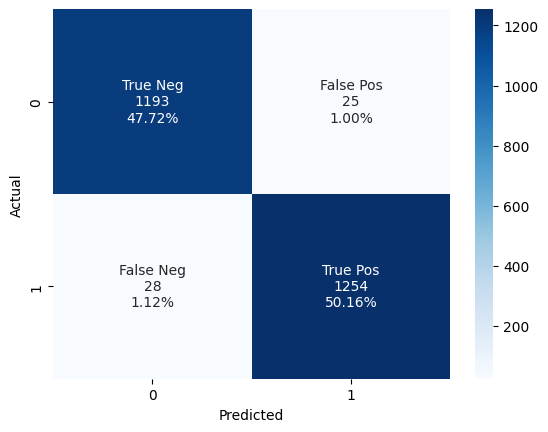

In [26]:
from lightgbm import LGBMClassifier
model_LGBM = LGBMClassifier()
model_LGBM.fit(X_train, y_train)

predictions_LGBM = model_LGBM.predict(X_test)
cm = confusion_matrix(y_test, predictions_LGBM)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions_LGBM))

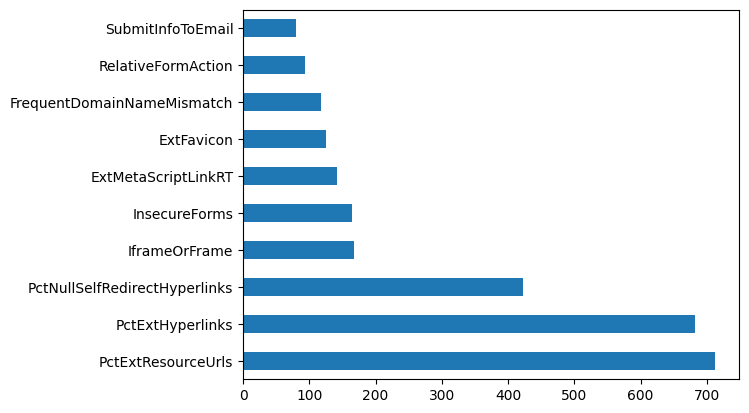

In [27]:
# Graph Feature Importance
feature_importances = pd.Series(model_LGBM.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


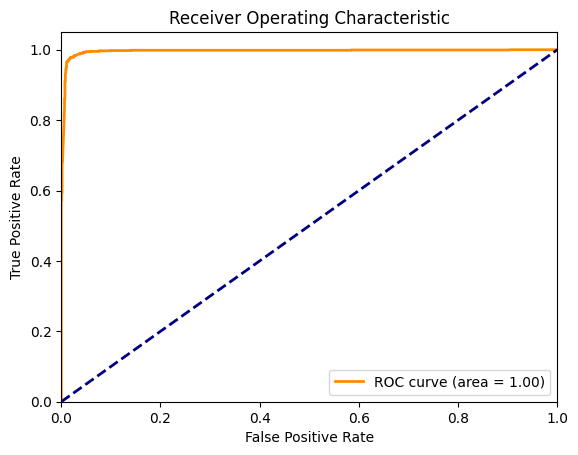

In [28]:
# Graph roc curve and auc score
probabilities = model_LGBM.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [29]:
# K fold cross validation
scores = cross_val_score(model_RF, X, y, cv=10, scoring='accuracy')

print("Scores")
print(scores)

print("Overall Accuracy: ", scores.mean())
lightgbm_overall_accuracy = scores.mean()

Scores
[0.976 0.967 0.976 0.981 0.976 0.975 0.978 0.958 0.968 0.976]
Overall Accuracy:  0.9730999999999999


#### Bagging Classifier

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1218
           1       0.98      0.98      0.98      1282

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



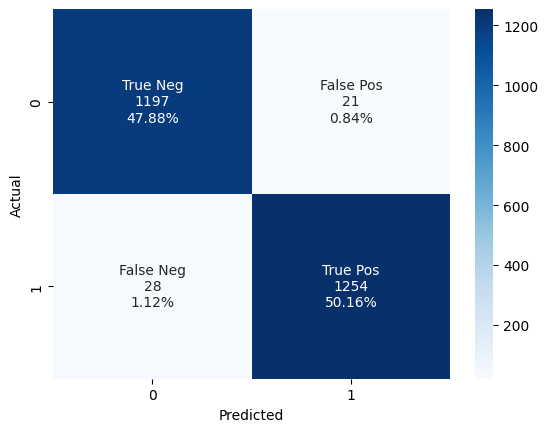

In [30]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier()
model_bagging.fit(X_train, y_train)

predictions_bagging = model_bagging.predict(X_test)
cm = confusion_matrix(y_test, predictions_bagging)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions_bagging))

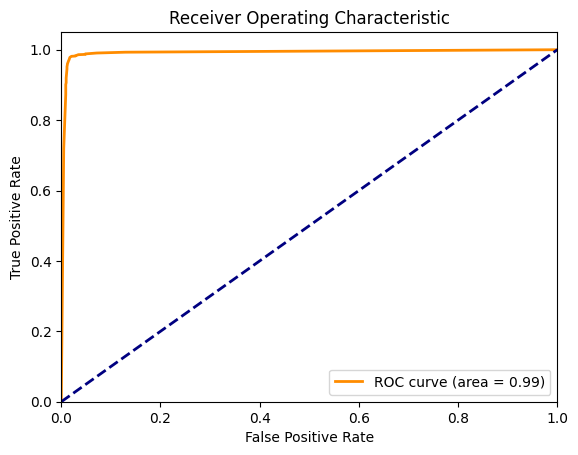

In [31]:
# Graph roc curve and auc score
probabilities = model_bagging.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [32]:
# K fold cross validation
scores = cross_val_score(model_bagging, X, y, cv=10, scoring='accuracy')

print("Scores")
print(scores)

print("Overall Accuracy: ", scores.mean())
bagging_overall_accuracy = scores.mean()

Scores
[0.97  0.962 0.974 0.975 0.973 0.973 0.973 0.953 0.964 0.978]
Overall Accuracy:  0.9695


#### XGB Classifier

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1218
           1       0.98      0.98      0.98      1282

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



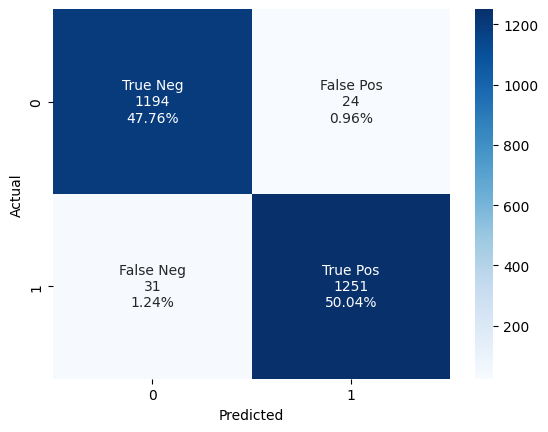

In [33]:
# XGBClassifier
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

predictions_xgb = model_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions_xgb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions_xgb))

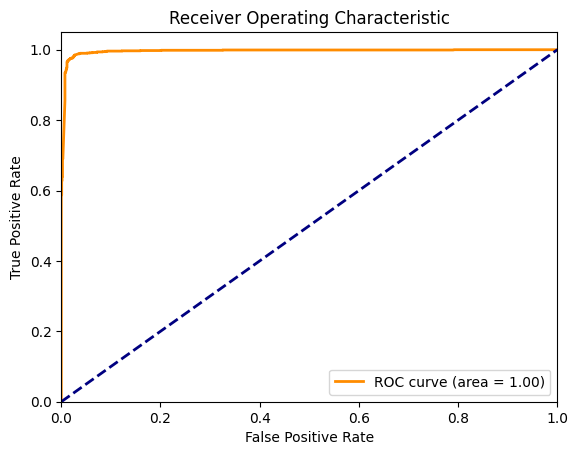

In [34]:
# Graph roc curve and auc score
probabilities = model_xgb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [35]:
# K fold cross validation
scores = cross_val_score(model_xgb, X, y, cv=10, scoring='accuracy')

print("Scores")
print(scores)

print("Overall Accuracy: ", scores.mean())
xgb_overall_accuracy = scores.mean()


Scores
[0.979 0.975 0.974 0.979 0.969 0.97  0.981 0.96  0.97  0.979]
Overall Accuracy:  0.9735999999999999


#### ExtraTrees Classifier

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1218
           1       0.98      0.98      0.98      1282

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



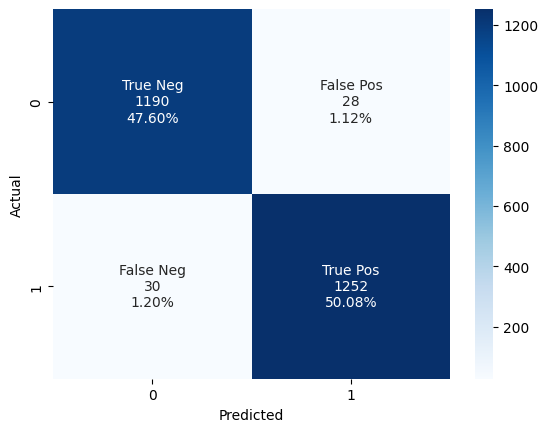

In [36]:
# ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X_train, y_train)

predictions_extra = model_extra.predict(X_test)
cm = confusion_matrix(y_test, predictions_extra)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions_extra))

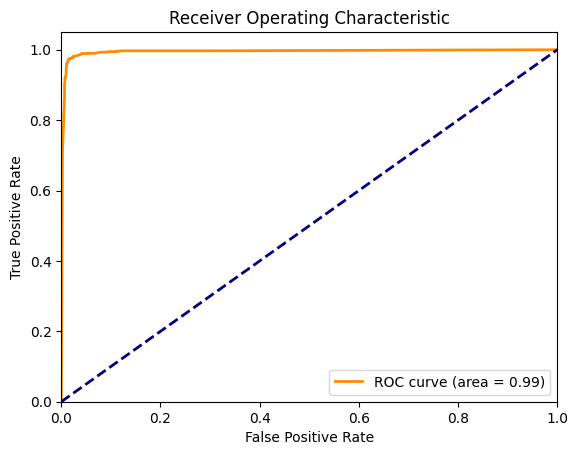

In [37]:
# Graph roc curve and auc score
probabilities = model_extra.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [38]:
# K fold cross validation
scores = cross_val_score(model_extra, X, y, cv=10, scoring='accuracy')

print("Scores")
print(scores)

print("Overall Accuracy: ", scores.mean())
extra_overall_accuracy = scores.mean()

Scores
[0.974 0.963 0.967 0.979 0.976 0.974 0.975 0.958 0.968 0.975]
Overall Accuracy:  0.9709


In [39]:
# Show all the models overall accuracy
print("Overall Accuracy")
print("Random Forest: ", random_forest_overall_accuracy)
print("LightGBM: ", lightgbm_overall_accuracy)
print("Bagging: ", bagging_overall_accuracy)
print("XGB: ", xgb_overall_accuracy)
print("ExtraTrees: ", extra_overall_accuracy)

Overall Accuracy
Random Forest:  0.9739000000000001
LightGBM:  0.9730999999999999
Bagging:  0.9695
XGB:  0.9735999999999999
ExtraTrees:  0.9709


In [40]:
# Save the model
import joblib
joblib.dump(model_LGBM, './models/content_LGBM_model.pkl')


['./models/content_LGBM_model.pkl']